In [36]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

# $\theta_1''=\frac{2 \mu  (\lambda  \mu +1) \sin
   (\theta_1-\theta_2) \left(\theta_1'^2 \cos
   (\theta_1-\theta_2)+\lambda  \theta_2'^2\right)+\left(\lambda ^2 \mu +1\right) (\mu  \sin (\theta_1-2
   \theta_2)+(\mu +2) \sin (\theta_1))}{(\lambda  \mu +1) (-\mu
   +\mu  \cos (2 (\theta_1-\theta_2))-2)}$
   

#   $\theta_2''= \frac{\sin (\theta_1-\theta_2) \left(-(\lambda 
   \mu +1) \left((\mu +1) \theta_1'^2+\lambda  \mu  \theta_2'^2
   \cos (\theta_1-\theta_2)\right)-(\mu +1) \left(\lambda ^2 \mu
   +1\right) \cos (\theta_1)\right)}{\lambda  (\lambda  \mu +1) \left(-\mu
   +\mu  \cos ^2(\theta_1-\theta_2)-1\right)}$
   
# $\lambda = \frac{\ell_2}{\ell_1}, \mu=\frac{m_2}{m_1}$

In [ ]:
#https://www.myphysicslab.com/pendulum/double-pendulum-en.html

In [19]:
def double_pend(theta_initial,mu=1,lam=1,tstop=10,dt=0.01):
    t = np.arange(0,tstop,dt)
    #Initialize them all at once
    w1,w2,theta1,theta2 = (np.zeros_like(t) for i in range(4))
    theta1[0] = np.deg2rad( theta_initial[0] )
    theta2[0] = np.deg2rad( theta_initial[1] )
    
    for i in range(1,t.size):
        #w1term1 = ( 
        #    2 * mu * ( lam*mu + 1 ) * np.sin( theta1[i-1]-theta2[i-1] )
        #                 * ( w1[i-1]**2 * np.cos(theta1[i-1]-theta2[i-1]) +lam * w2[i-1]**2 ) 
        #)
        #w1term2 = (
        #    (lam**2*mu+1)*( mu*np.sin(theta1[i-1]-2*theta2[i-1]) + (mu+2)*np.sin(theta1[i-1]) )
        #)
        #w1term3 = (
        #    (lam*mu+1)*(-mu * mu*np.cos(2*(theta1[i-1]-theta2[i-1]))-2)
        #)
        
        dw1dt = ( 
            ((1 + lam**2* mu)* ((2 + mu)* np.sin(theta1[i-1]) + mu *np.sin(theta1[i-1] - 2* theta2[i-1]) )
             + 2 *mu* (1 + lam* mu)* np.sin(theta1[i-1] - theta2[i-1])* (np.cos(theta1[i-1] - theta2[i-1])* w1[i-1]**2 + lam* w2[i-1]**2))/
            ((1 + lam* mu) *(-2 - mu + mu *np.cos(2* (theta1[i-1] - theta2[i-1])) ))
        )
        
        #w2term1 = (
        #    -(lam*mu+1)*( (mu+1)*w1[i-1]**2 +lam*mu*w2[i-1]**2*np.cos(theta1[i-1]-theta2[i-1]) )
        #)
        
        #w2term2 = (
        #    -(mu+1)*(lam**2*mu+1)*np.cos(theta1[i-1])
        #)
        
        #w2term3 = (
        #    lam*(lam*mu+1)*(-mu+mu*np.cos(theta1[i-1]-theta2[i-1])**2-1)
        #)
        
        dw2dt = (
            (np.sin(theta1[i-1] - theta2[i-1]) * (-(1 + mu) * (1 + lam**2 * mu) * np.cos(theta1[i-1])
            - (1 + lam * mu) * ((1 + mu)* w1[i-1]**2 + lam *mu *np.cos(theta1[i-1] - 
            theta2[i-1])* w2[i-1]**2))) / 
            (lam* (1 + lam* mu) *(-1 - mu +mu * np.cos(theta1[i-1] - theta2[i-1])**2))
        )
        
        w1[i] = w1[i-1] + dw1dt * dt
        w2[i] = w2[i-1] + dw2dt * dt
        theta1[i] = theta1[i-1] + w1[i] * dt
        theta2[i] = theta2[i-1] + w2[i] * dt
        
    return {'t':t,'theta1':theta1,'theta2':theta2}

In [34]:
mu = 0.5
lam = 0.5
result = double_pend([120,120],mu=mu,lam=lam,tstop=100)

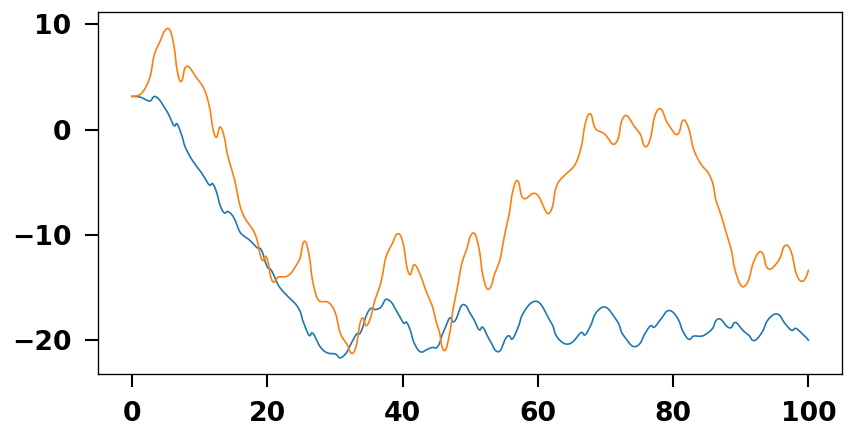

In [33]:
plt.plot( result['t'],result['theta1'])
plt.plot( result['t'],result['theta2'])

In [37]:
Video( "double_pend1.mp4" )

In [38]:
Video( "double_pend2.mp4" )

In [39]:
Video( "double_pend3.mp4" )

In [40]:
Video( "double_pend4.mp4" )

## Animation

0 of 10000
500 of 10000
1000 of 10000
1500 of 10000
2000 of 10000
2500 of 10000
3000 of 10000
3500 of 10000
4000 of 10000
4500 of 10000
5000 of 10000
5500 of 10000
6000 of 10000
6500 of 10000
7000 of 10000
7500 of 10000
8000 of 10000
8500 of 10000
9000 of 10000
9500 of 10000


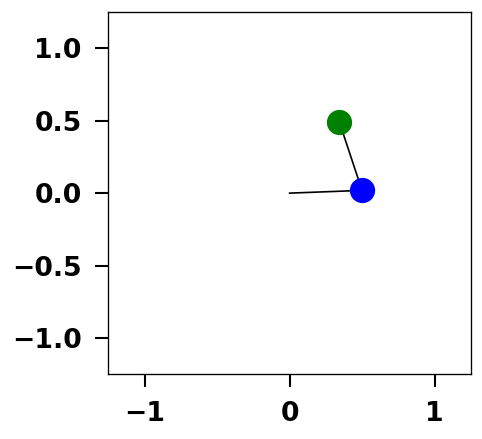

In [35]:
from matplotlib.animation import FuncAnimation

fname = 'double_pend4.mp4'

lam = 1
l1 = 1 / (1 + lam)
l2 = lam * l1
bob1_x = l1 * np.sin( result['theta1'] )
bob1_y = -l1 * np.cos( result['theta1'] )
bob2_x = bob1_x + l2 * np.sin( result['theta2'] )
bob2_y = bob1_y - l2 * np.cos( result['theta2'] )


fig = plt.figure()
ax = plt.axes(xlim=(-1.25,1.25), ylim=(-1.25,1.25))
string1, = ax.plot( [],[], c='k',zorder=1 )
string2, = ax.plot( [],[], c='k',zorder=2 )
bob1 = ax.scatter( [],[],s=200,zorder=3,c='blue' )
bob2 = ax.scatter( [],[],s=200,zorder=4,c='green' )
ax.set_aspect('equal')
def init():
    string1.set_data( [], [] )
    string2.set_data( [], [] )
    bob1.set_offsets( np.array( [[],[]]).T )
    bob2.set_offsets( np.array( [[],[]]).T )
    return (string1,string2,bob1,bob2)

def animate(i):
    if( i % 500 == 0 ):
        print( "{} of {}".format(i,result['t'].size) )
    x1 = bob1_x[i]
    y1 = bob1_y[i]
    x2 = bob2_x[i]
    y2 = bob2_y[i]
    string1.set_data( [0,x1],[0,y1] )
    string2.set_data( [x1,x2],[y1,y2] )
    bob1.set_offsets( np.array( [ [x1], [y1] ] ).T )
    bob2.set_offsets( np.array( [ [x2], [y2] ] ).T )
    return (string1,string2,bob1,bob2)
    
    
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=result['t'].size, interval=5, blit=True)

anim.save(fname)